# --------------------------Big Data Mart Sales Problem-----------------------------------

### Problem Statement:

##### The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

**Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing the sales of their products.**

**The dataset includes two files:**

**- bigdatamart_Train.csv: Use this file for the model building purpose.**

**- bigdatamart_Test.csv: Use this file for getting predictions from the trained model.**

# ----------------------------------------------------------------------------------------------------

# **COLUMNS DISCRIPTIONS**

**Item_Identifier : Unique product ID***

**Item_Weight : Weight of product**

**Item_Fat_Content : Whether the product is low fat or not**

**Item_Visibility : The % of total display area of all products in a store allocated to the particular product**

**Item_Type : The category to which the product belongs**

**Item_MRP : Maximum Retail Price (list price) of the product**

**Outlet_Identifier : Unique store ID**

**Outlet_Establishment_Year : The year in which store was established**

**Outlet_Size : The size of the store in terms of ground area covered**

**Outlet_Location_Type : The type of city in which the store is located**

**Outlet_Type : Whether the outlet is just a grocery store or some sort of supermarket**

**Item_Outlet_Sales : Sales of the product in the particular store.**

# Lets start exploring the dataset by loading

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('bigdatamart_Train.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [4]:
df.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [5]:
df.sample(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7657,FDX44,9.30,Low Fat,0.042958,Fruits and Vegetables,89.3172,OUT035,2004,Small,Tier 2,Supermarket Type1,2051.9956
4482,FDG16,15.25,Low Fat,0.089956,Frozen Foods,217.1192,OUT049,1999,Medium,Tier 1,Supermarket Type1,3235.7880
613,FDX46,12.30,Regular,0.000000,Snack Foods,57.3562,OUT013,1987,High,Tier 3,Supermarket Type1,177.7686
8219,NCK06,5.03,Low Fat,0.008664,Household,119.3756,OUT045,2002,NaN,Tier 2,Supermarket Type1,605.8780
2284,FDB20,7.72,Low Fat,0.051937,Fruits and Vegetables,77.9986,OUT013,1987,High,Tier 3,Supermarket Type1,934.7832


# As we know that we have test data also given so load it

In [6]:
dff=pd.read_csv('bigdatamart_Test.csv')
dff.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


**We can Clearly see that the data in test data also we dont have a standard data ,it has null data aswell and it dont contain output or target data**

# Checking Null Value In The DataFrame

In [7]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
df.shape

(8523, 12)

In [9]:
dff.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [10]:
dff.shape

(5681, 11)

In [11]:
df.isnull().sum()/df.shape[0] *100


Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

**df(training) :- Item_Weight=17% ,Outlet_Size=28% have Null Values.**

In [12]:
dff.isnull().sum()/dff.shape[0] *100


Item_Identifier               0.000000
Item_Weight                  17.180074
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.269671
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
dtype: float64

**dff(testing) :- Item_Weight=17% ,Outlet_Size=28% have Null Values.**

# Checking Data types of the columns

In [13]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [14]:
dff.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

**We have 7 object columns in both training(df) and testing(dff) namely :- Item_Identifier , Item_Fat_Content , Item_Type , Outlet_Identifier , Outlet_Size , Outlet_Location_Type , Outlet_Type..**

###### ----------------------------------------------------------------------------------

**We have 4 float64 and int64 columns in both training(df) and testing(dff) namely :- Item_Weight , Item_Visibility , Item_MRP , Outlet_Establishment_Year ..**

# ------------------------------------------------------------------------------------------

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [16]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [17]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [18]:
# In Training Data
df['Item_Fat_Content'].replace(['LF','reg','low fat'],['Low Fat','Regular','Low Fat'],inplace=True)

In [19]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [20]:
#in Testing Data
dff['Item_Fat_Content'].replace(['LF','reg','low fat'],['Low Fat','Regular','Low Fat'],inplace=True)

In [21]:
dff['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [22]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

# Now Lets fill the NaN Values

In [23]:
df['Item_Weight'].isnull().sum(),dff['Item_Weight'].isnull().sum()

(1463, 976)

**In Item Weight the training data or df have 1463 Null values , and Item Weight of testing or dff have 976 Null Values**

In [24]:
df['Outlet_Size'].isnull().sum(),dff['Outlet_Size'].isnull().sum()

(2410, 1606)

**In Outlet Size the training data or df have 2410 Null values , and Item Weight of testing or dff have 1606 Null Values**

In [25]:
# Now Lets remove the Outliers By Fillna method and we will use mean bcz data is continious in Item Weight

df['Item_Weight']= df['Item_Weight'].fillna(df['Item_Weight'].mean())
dff['Item_Weight']= dff['Item_Weight'].fillna(dff['Item_Weight'].mean())

In [26]:
df['Item_Weight'].isnull().sum(),dff['Item_Weight'].isnull().sum()

(0, 0)

In [27]:
# Now Lets remove the Outliers By Fillna method and we will use mode bcz data is catagorical in Outlet size

df['Outlet_Size']= df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0])
dff['Outlet_Size']= dff['Outlet_Size'].fillna(dff['Outlet_Size'].mode()[0])

In [28]:
df['Outlet_Size'].isnull().sum(),dff['Outlet_Size'].isnull().sum()

(0, 0)

In [29]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [30]:
dff.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

**Now I have successfully imputed the values of each columns and there are 0 null values now**

# Exploratory Data Analysis (EDA)

In [31]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

<h2 style='text-align:center;font-size:30px;background-color:CRIMSON;border:20px;color:white'>A. Univariate Analysis <h2>

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

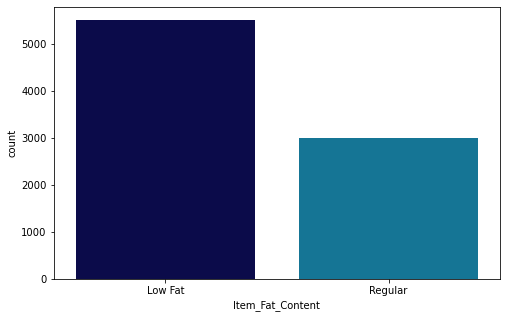

In [32]:
plt.figure(figsize=(8,5))
sns.countplot('Item_Fat_Content',data=df,palette='ocean')

**We can see that people are more of Low Fat items as it is good for health too**

**----------------------------------------------------------------------------------------------------------------------**

<AxesSubplot:xlabel='Item_Visibility', ylabel='count'>

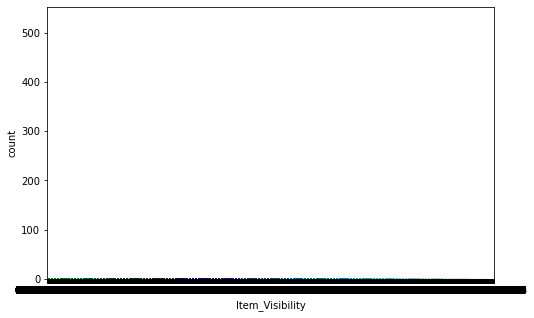

In [33]:
plt.figure(figsize=(8,5))
sns.countplot('Item_Visibility',data=df,palette='ocean')

**Item visibility is not making any sense to be plotted in Univariate Analysis bcz it is also a large continous data ,But we know one thing for sure that when an Item it more exposed or more visible ,it has more possibility of being sold as compared to other items**

<AxesSubplot:xlabel='Item_Type', ylabel='count'>

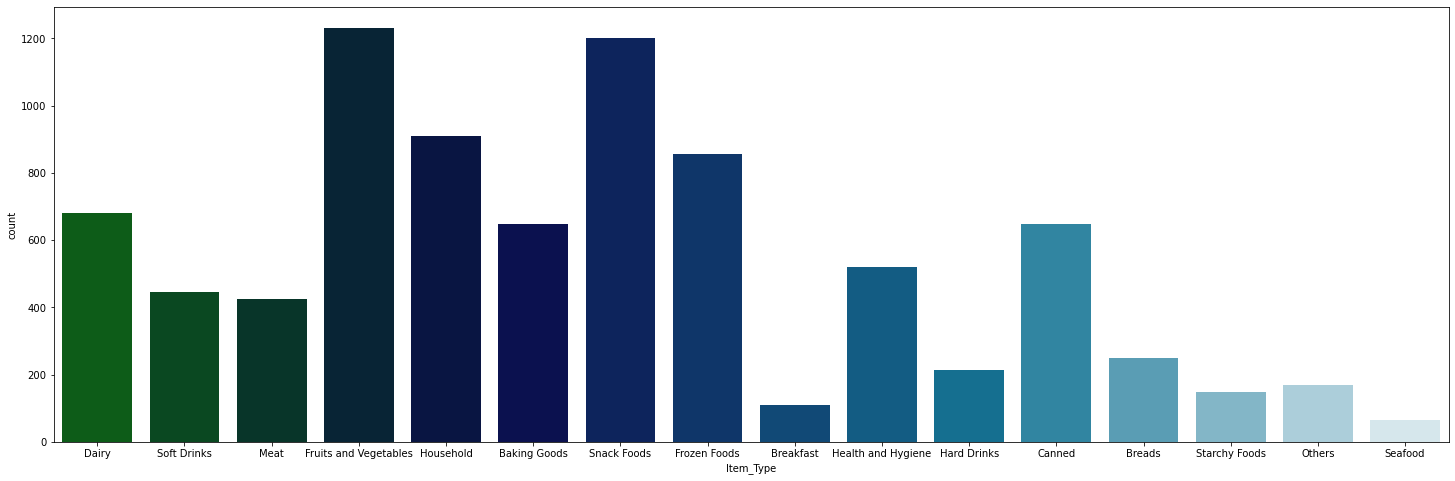

In [34]:
plt.figure(figsize=(25,8))
sns.countplot('Item_Type',data=df,palette='ocean')

**Fruit and Vegitables are largely sold as per the data,and it also forms the basic part of day to day life**

**Snack items also have large sale values**

**The least sold is Seafood**

###### --------------------------------------------------

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='count'>

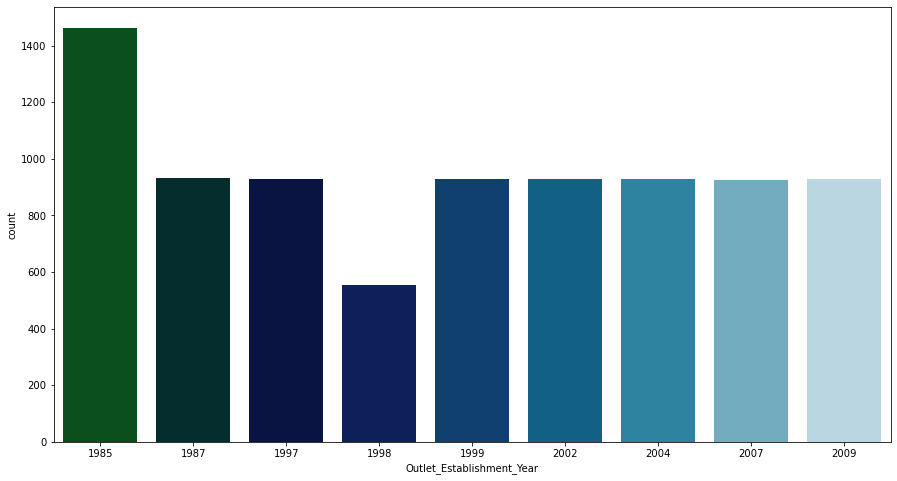

In [35]:
plt.figure(figsize=(15,8))
sns.countplot('Outlet_Establishment_Year',data=df,palette='ocean')

**WE can see maximum companies are established between 1985 and are running**

<AxesSubplot:xlabel='Item_Weight', ylabel='count'>

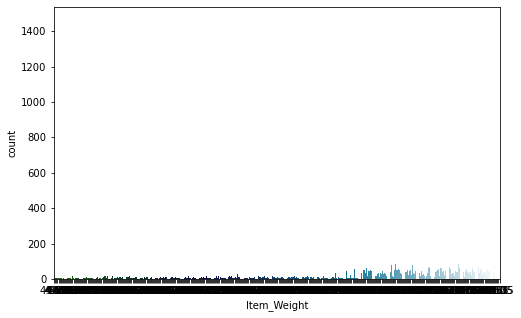

In [36]:
plt.figure(figsize=(8,5))
sns.countplot('Item_Weight',data=df,palette='ocean')

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

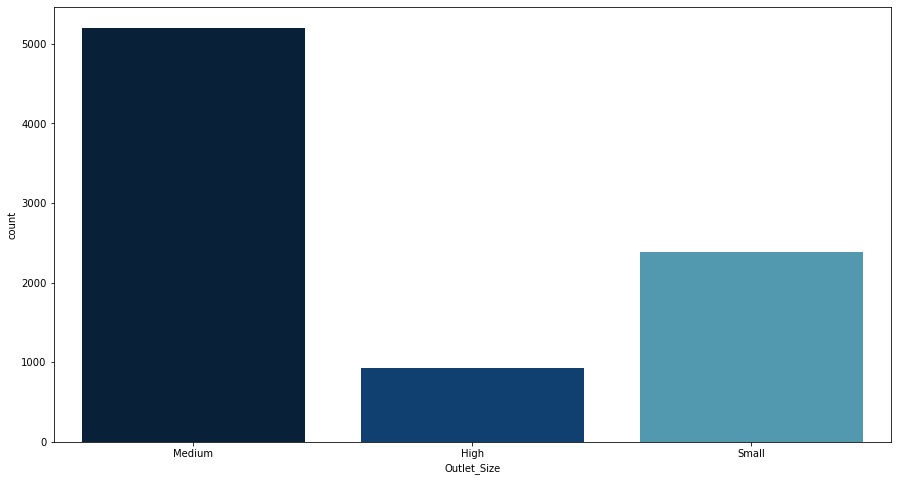

In [37]:
plt.figure(figsize=(15,8))
sns.countplot('Outlet_Size',data=df,palette='ocean')

**Medium size Outlet are more in Number as Compared to High and small**

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

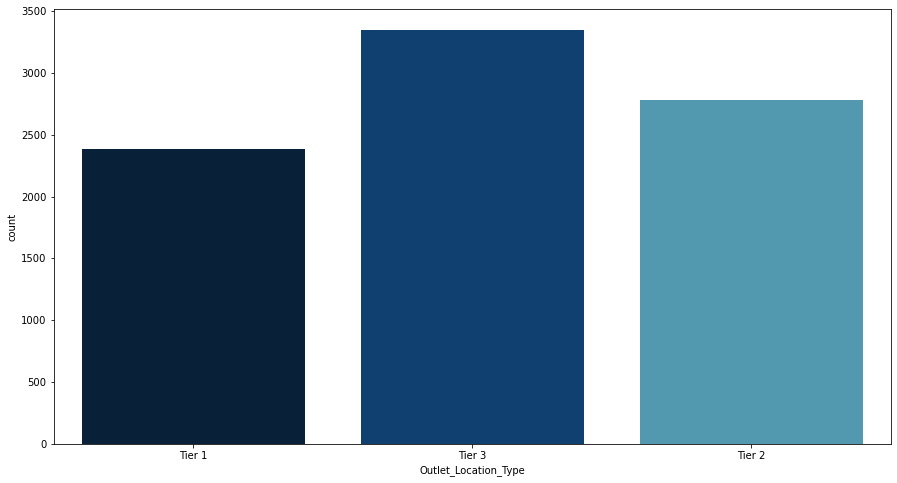

In [38]:
plt.figure(figsize=(15,8))
sns.countplot('Outlet_Location_Type',data=df,palette='ocean')

**-------Outlets are located most in Tier3 cities than followed by Tier2 and at last Tier1-------**

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

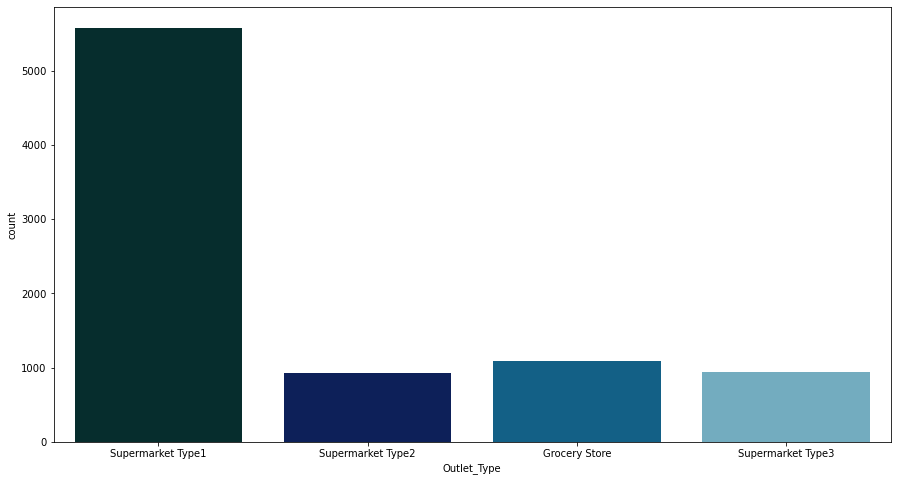

In [39]:
plt.figure(figsize=(15,8))
sns.countplot('Outlet_Type',data=df,palette='ocean')

**SuperMarketType 1 is maximum in Number of type of Outlets after that there is grocery store but it is still less,In SuperMarketType 1 we get maximum of our utility available at one place**

#### ---------------------------------------------------------------------------------------------------------------------------------------------------

<h2 style='text-align:center;font-size:30px;background-color:CRIMSON;border:20px;color:white'>B. Bivariate Analysis <h2>


In [40]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

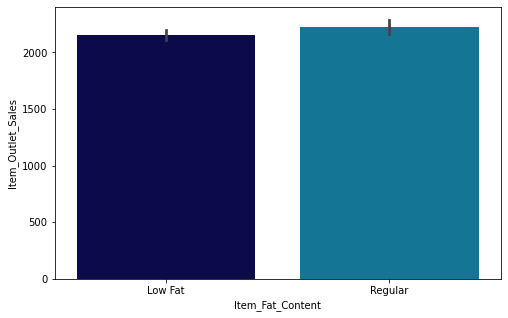

In [41]:
plt.figure(figsize=(8,5))
sns.barplot(x='Item_Fat_Content',y='Item_Outlet_Sales',data=df,palette='ocean')

**We can see that Both the Items(Low Fat and Regular) are Equally sold** 

<AxesSubplot:xlabel='Item_Weight', ylabel='Item_Outlet_Sales'>

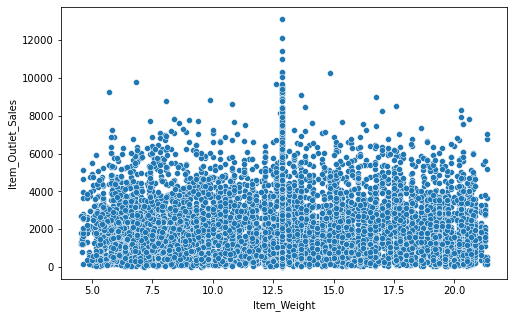

In [42]:
# There is no point plotting item weight as per Item sold bcz people by things according to their Need and their affordability
plt.figure(figsize=(8,5)) 
sns.scatterplot(x='Item_Weight',y='Item_Outlet_Sales',data=df,palette='ocean')

**But at Weight 12.5 Maximum items are sold**

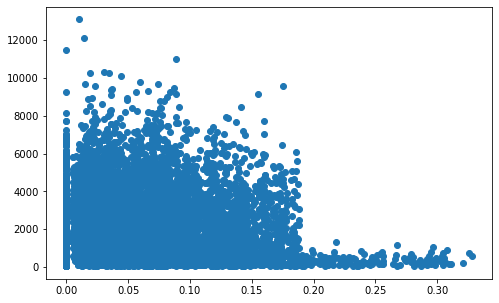

In [43]:
plt.figure(figsize=(8,5))
plt.scatter('Item_Visibility','Item_Outlet_Sales',data=df)

**This plot is Not making any sense as we know that The more the Item is exposed it has good chances of being sold bcz of its visibility.. And Here we are watching that at 0 visibility also it has a good sale and at 0.30 visibility the item have least sales ...so this data irrelevent to Outlet sale**

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Item_Type'>

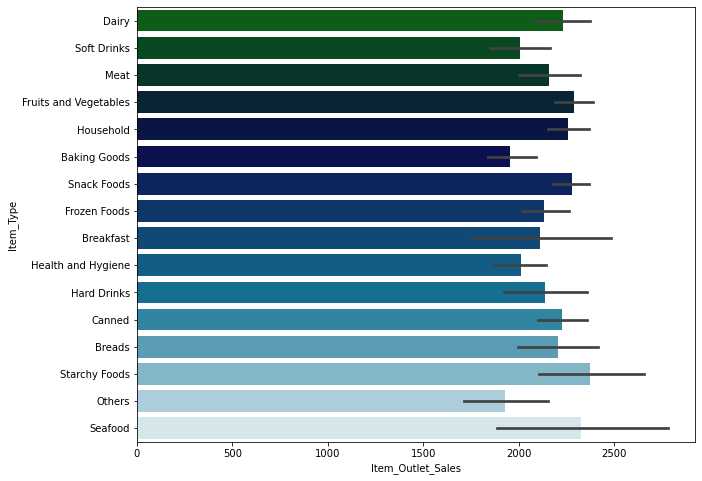

In [44]:
plt.figure(figsize=(10,8))
sns.barplot(y='Item_Type',x='Item_Outlet_Sales',data=df,palette='ocean')

**The products available were Fruits-Veggies and Snack Foods but the sales of Seafood and Starchy Foods seems higher and hence the sales can be improved with having stock of products that are most bought by customers.**

Text(0, 0.5, 'Item Outlet Sales')

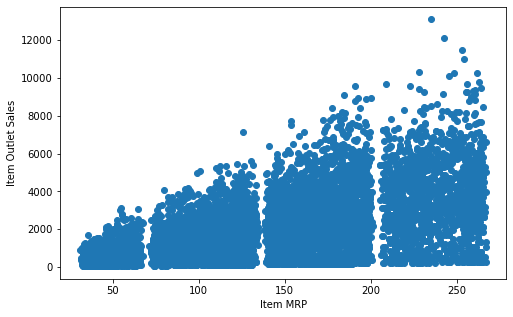

In [45]:
plt.figure(figsize=(8,5))
plt.scatter(y='Item_Outlet_Sales',x='Item_MRP',data=df)
plt.xlabel('Item MRP')
plt.ylabel('Item Outlet Sales')

**We can see that the maximum sale for the product is which are having MRP between 200 to 250**

In [46]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Item_Outlet_Sales'>

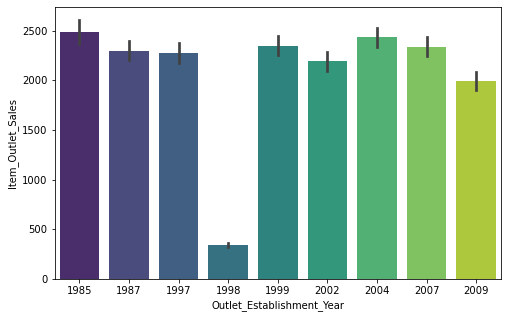

In [47]:
plt.figure(figsize=(8,5))
sns.barplot(x='Outlet_Establishment_Year',y='Item_Outlet_Sales',data=df,palette='viridis')

**It is quiet evident that Outlets established in 1985 is having good Sales margin bcz they are in the market and they know how to operate..Established years wouldn't improve the Sales unless the products are sold according to customer's interest bcz we can see that year 1998 is having least sales as compared to before and after years..Here we not getting out any relevent information from the Establishment year . .**

<AxesSubplot:xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

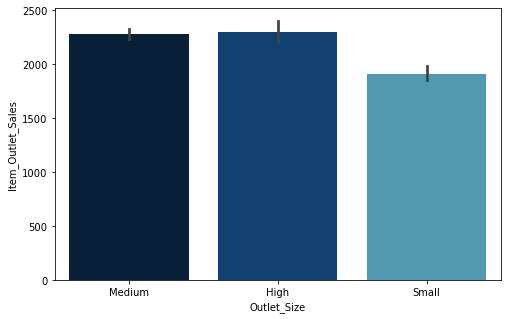

In [48]:
plt.figure(figsize=(8,5))
sns.barplot(x='Outlet_Size',y='Item_Outlet_Sales',data=df,palette='ocean')

**The Maximum sale is given by the High and Medium  Outlet size**

**Although small outlet  size sales ca even be improved**

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

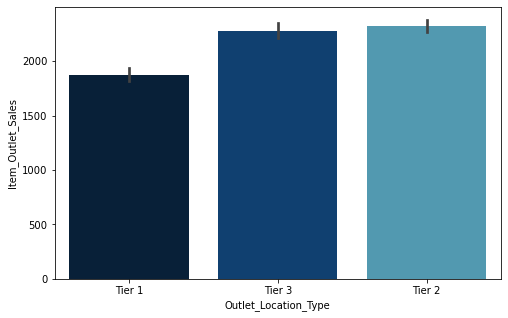

In [49]:
plt.figure(figsize=(8,5))
sns.barplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',data=df,palette='ocean')

**We can see that the sale in Tier 2 and Tier 3 is almost equal and High but Tier 1 is bit less which can even be improved easily**

# ---------------------------------------------------------------------------------------

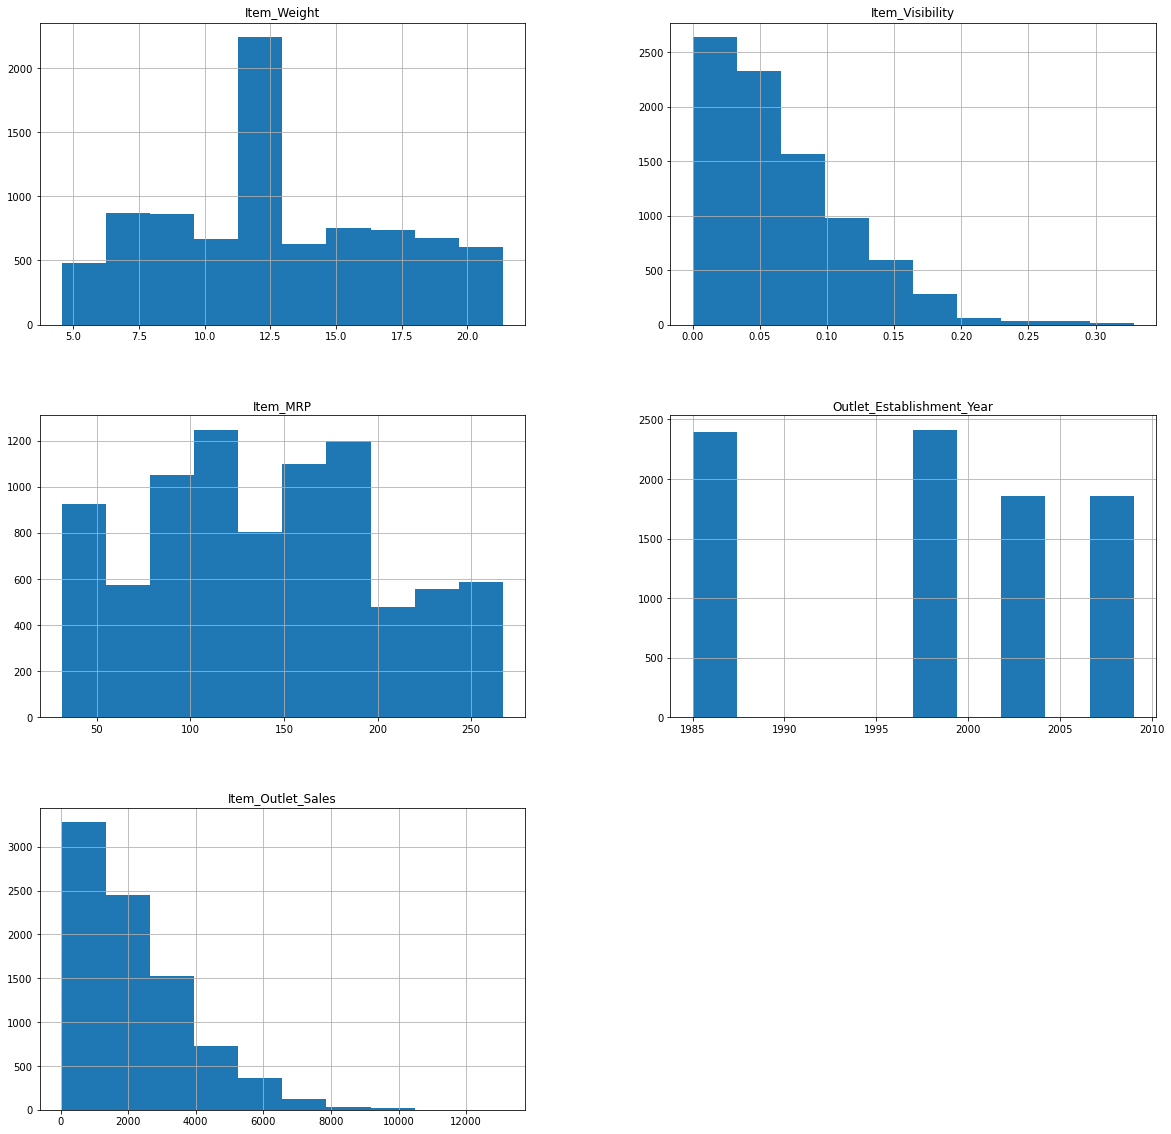

In [50]:
df.hist(bins=10, figsize=(20,20))
plt.show()

**We can see that skewness is present in the data which will be treated laterm**

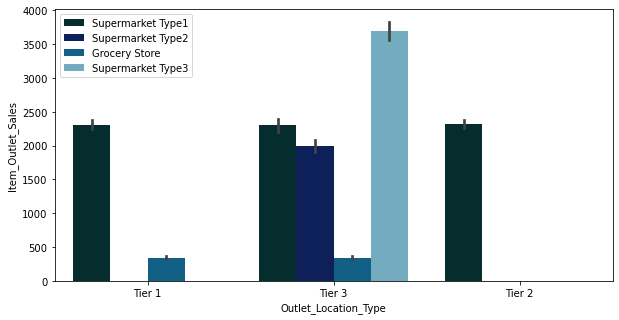

In [51]:
plt.figure(figsize=(10,5))
sns.barplot('Outlet_Location_Type','Item_Outlet_Sales',hue='Outlet_Type',data=df,palette='ocean')
plt.legend()

**The Tier-3 location type has all types of Outlet type and has high sales margin.**

<Figure size 1800x2160 with 0 Axes>

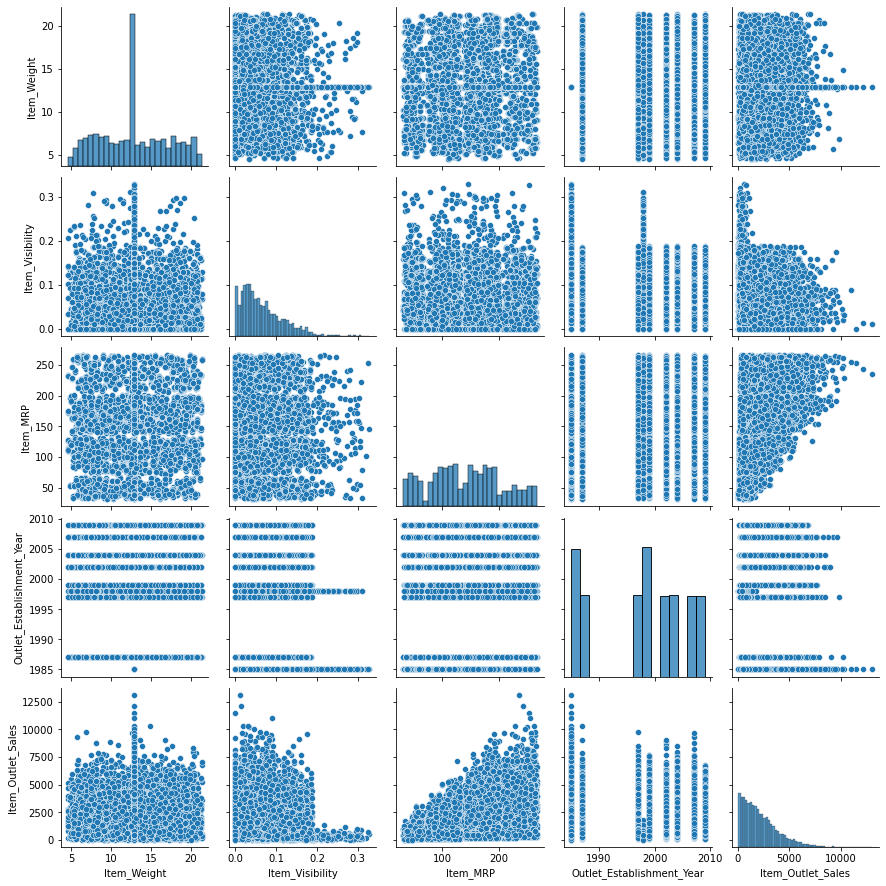

In [52]:
# Lets plot eerything all together

plt.figure(figsize=(25,30))

sns.pairplot(df)

plt.show()

# ----------------------------------------------------------------------------------------------

<h2 style='text-align:center;font-size:30px;background-color:CRIMSON;border:20px;color:white'> CORRELATION <h2>

In [53]:
df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.012049,0.024756,-0.008301,0.011550
Item_Visibility,-0.012049,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.024756,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.008301,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.011550,-0.128625,0.567574,-0.049135,1.000000


In [54]:
df.corr()['Item_Outlet_Sales'].sort_values()

Item_Visibility             -0.128625
Outlet_Establishment_Year   -0.049135
Item_Weight                  0.011550
Item_MRP                     0.567574
Item_Outlet_Sales            1.000000
Name: Item_Outlet_Sales, dtype: float64

**Item Visibility have very less correlation to taget variable and this is true also we can see it on above plotting too**

**Outlet_Establishment_Year also dont have much impact on target variable ,as it does not matter when it is established ,what matters is it should according to customer interest for successfull life ahead..**

**If we want we can drop this columns also because it is acting very negatively to target variable**

<AxesSubplot:>

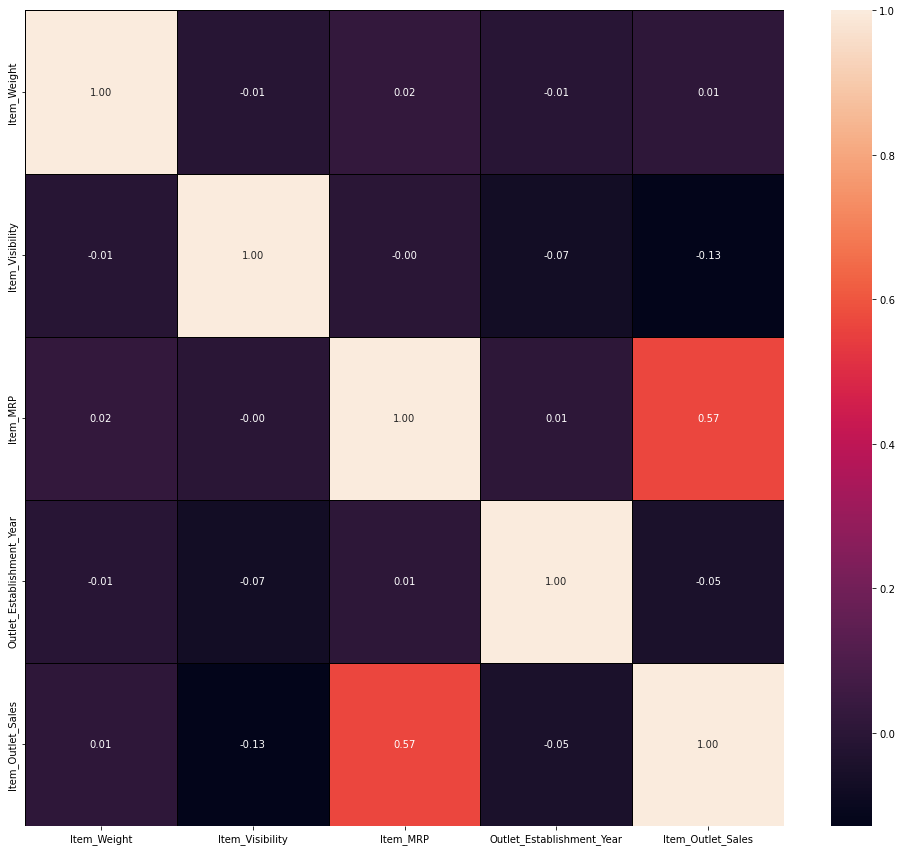

In [55]:
plt.figure(figsize=(17,15))
sns.heatmap(df.corr(),annot=True,linewidths=0.5,linecolor='black',fmt='.2f')


<h2 style='text-align:center;font-size:15px;background-color:CRIMSON;border:20px;color:white'> % of input variable correlated to target variable <h2>

**Item_Visibility             -0.13%**
    
**Outlet_Establishment_Year   -0.05%**
    
**Item_Weight                  0.01%**
    
**Item_MRP                     0.57%**

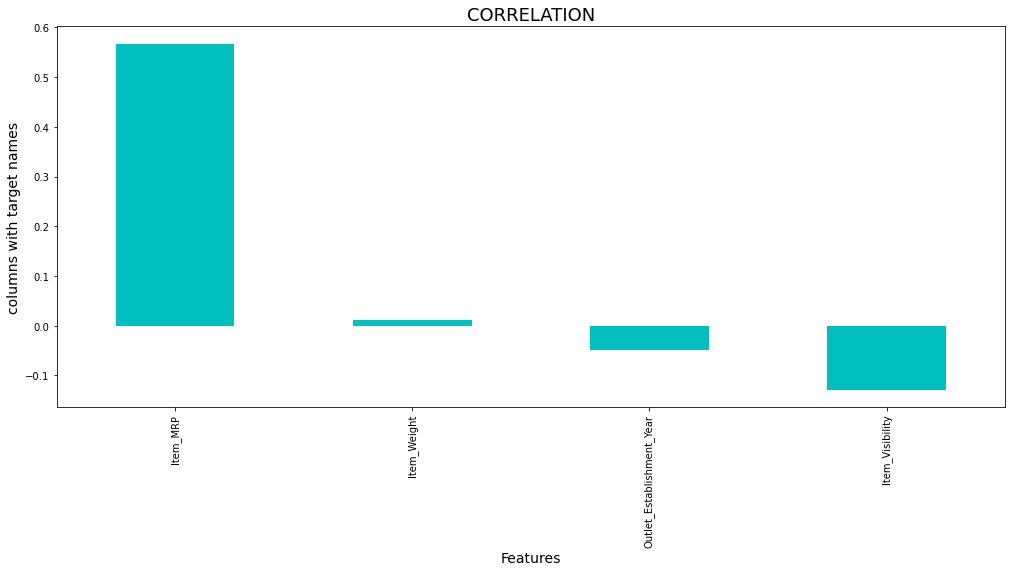

In [56]:
#checking the columns which are positively and negatively correlated

plt.figure(figsize=(17,7))
df.corr()['Item_Outlet_Sales'].sort_values(ascending=False).drop(['Item_Outlet_Sales']).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=14)
plt.ylabel('columns with target names',fontsize=14)
plt.title('CORRELATION',fontsize=18)
plt.show()

**Here we can clearly see two of the columns having negative relationship,But there is no Multicollinearity present here**

<h2 style='text-align:center;font-size:30px;background-color:CRIMSON;border:20px;color:white'> DESCRIPTIVE STATISTICS <h2>



In [57]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


<AxesSubplot:>

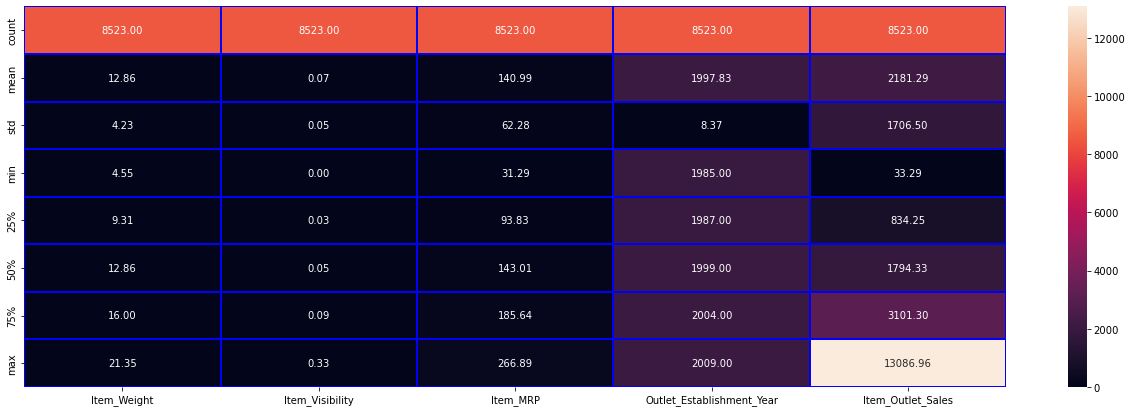

In [58]:
plt.figure(figsize=(22,7))
sns.heatmap(df.describe(),annot=True,linewidths=0.2,linecolor="blue",fmt="0.2f")

#### Outcome of describe() of dataset :-

**from the above plotting we are determining mean,standard deviation,minimum and maximum value of each column**

**Total number rows and column in dataset:-**

**Rows :- 8523**

**columns :- 12**



**Item Weight**

Mean    :- 12.86

std     :- 4.23

minimum :- 4.55

Maximum :- 21.35
    
    
**Item Visibility**

Mean    :- 0.07

std     :- 0.05

minimum :- 0.00

Maximum :- 0.33
    

**Item_MRP**

Mean    :- 140.99

std     :- 62.28

minimum :- 31.29

Maximum :- 266.89
    
    
**Outlet_Establishment_Year**


Mean    :- 1997.83

std     :- 8.37

minimum :- 1985.00

Maximum :- 2009.00
 

..........................................................................................
    

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


# Now Lets Check Outliers 1st

In [60]:
#WE are droping some columns some training and testing data both bcz they are not of any use
df = df.drop(['Item_Identifier','Outlet_Identifier'],axis=1)
dff= dff.drop(['Item_Identifier','Outlet_Identifier'],axis=1)

In [61]:
df.shape,dff.shape

((8523, 10), (5681, 9))

Item_Weight                     AxesSubplot(0.125,0.749828;0.133621x0.130172)
Item_Visibility              AxesSubplot(0.285345,0.749828;0.133621x0.130172)
Item_MRP                      AxesSubplot(0.44569,0.749828;0.133621x0.130172)
Outlet_Establishment_Year    AxesSubplot(0.606034,0.749828;0.133621x0.130172)
Item_Outlet_Sales            AxesSubplot(0.766379,0.749828;0.133621x0.130172)
dtype: object

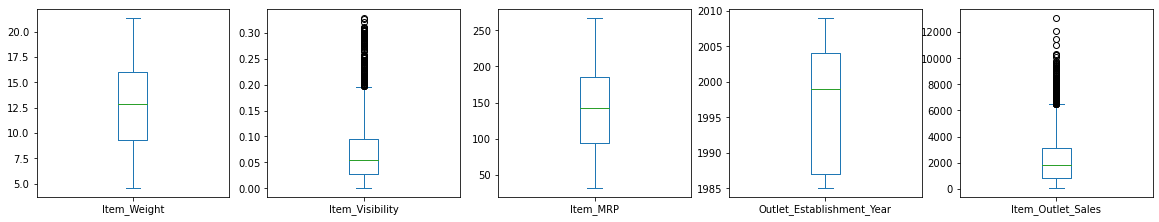

In [62]:
df.plot(kind='box',subplots=True,layout=(5,5),figsize=(20,20))


**Here we can see that when we are plotting we are not getting full data in order to get full data lets do Encoding on the dataset**

In [63]:
from sklearn.preprocessing import LabelEncoder


In [64]:
#Lets use label Encoder for both Training and testing data to convert all catagorical columns to Int format

le = LabelEncoder()
Input = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','Item_Type']

for i in Input:
    df[i] = le.fit_transform(df[i])
    
for i in Input:
    dff[i] = le.fit_transform(dff[i])

In [65]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,0,0.016047,4,249.8092,1999,1,0,1,3735.1380
1,5.92,1,0.019278,14,48.2692,2009,1,2,2,443.4228
2,17.50,0,0.016760,10,141.6180,1999,1,0,1,2097.2700
3,19.20,1,0.000000,6,182.0950,1998,1,2,0,732.3800
4,8.93,0,0.000000,9,53.8614,1987,0,2,1,994.7052


In [66]:
dff.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750000,0,0.007565,13,107.8622,1999,1,0,1
1,8.300000,1,0.038428,4,87.3198,2007,1,1,1
2,14.600000,0,0.099575,11,241.7538,1998,1,2,0
3,7.315000,0,0.015388,13,155.0340,2007,1,1,1
4,12.695633,1,0.118599,4,234.2300,1985,1,2,3


Item_Weight                     AxesSubplot(0.125,0.749828;0.133621x0.130172)
Item_Fat_Content             AxesSubplot(0.285345,0.749828;0.133621x0.130172)
Item_Visibility               AxesSubplot(0.44569,0.749828;0.133621x0.130172)
Item_Type                    AxesSubplot(0.606034,0.749828;0.133621x0.130172)
Item_MRP                     AxesSubplot(0.766379,0.749828;0.133621x0.130172)
Outlet_Establishment_Year       AxesSubplot(0.125,0.593621;0.133621x0.130172)
Outlet_Size                  AxesSubplot(0.285345,0.593621;0.133621x0.130172)
Outlet_Location_Type          AxesSubplot(0.44569,0.593621;0.133621x0.130172)
Outlet_Type                  AxesSubplot(0.606034,0.593621;0.133621x0.130172)
Item_Outlet_Sales            AxesSubplot(0.766379,0.593621;0.133621x0.130172)
dtype: object

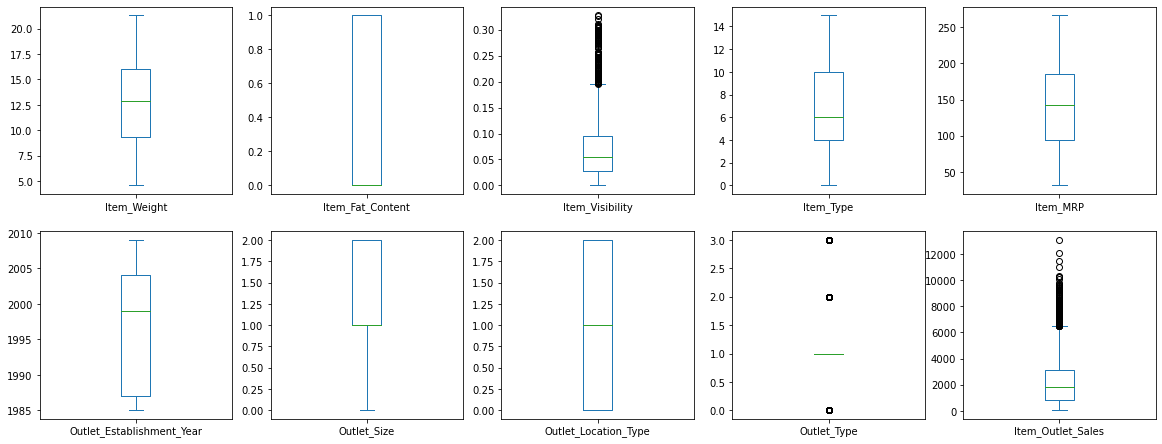

In [67]:
df.plot(kind='box',subplots=True,layout=(5,5),figsize=(20,20))


In [68]:
df.corr()['Item_Outlet_Sales'].sort_values()

Item_Visibility             -0.128625
Outlet_Size                 -0.086182
Outlet_Establishment_Year   -0.049135
Item_Weight                  0.011550
Item_Type                    0.017048
Item_Fat_Content             0.018719
Outlet_Location_Type         0.089367
Outlet_Type                  0.401522
Item_MRP                     0.567574
Item_Outlet_Sales            1.000000
Name: Item_Outlet_Sales, dtype: float64

In [69]:
# making a dataframe which is a conclusion of the columns that we will be dropping from the data bcz of being negatively correlated

delete=pd.DataFrame([["-0.128625","Item_Visibility","No","Alot"],["-0.049135","Outlet_Establishment_Year","No","No"]],
                    columns=["Corelation with target","Column name","Normalised","Outliers"])

delete

,Corelation with target,Column name,Normalised,Outliers
0,-0.128625,Item_Visibility,No,Alot
1,-0.049135,Outlet_Establishment_Year,No,No


**Here Item visibility is more required to be dropped because it has Outliers present and It's not Normalized too**

In [70]:
df=df.drop(["Item_Visibility"],axis=1)


In [71]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,0,4,249.8092,1999,1,0,1,3735.1380
1,5.92,1,14,48.2692,2009,1,2,2,443.4228
2,17.50,0,10,141.6180,1999,1,0,1,2097.2700
3,19.20,1,6,182.0950,1998,1,2,0,732.3800
4,8.93,0,9,53.8614,1987,0,2,1,994.7052


# Now Lets Check Skewness Again

In [72]:
df.skew()

Item_Weight                  0.090561
Item_Fat_Content             0.616705
Item_Type                    0.101655
Item_MRP                     0.127202
Outlet_Establishment_Year   -0.396641
Outlet_Size                 -0.087072
Outlet_Location_Type        -0.209093
Outlet_Type                  0.927438
Item_Outlet_Sales            1.177531
dtype: float64

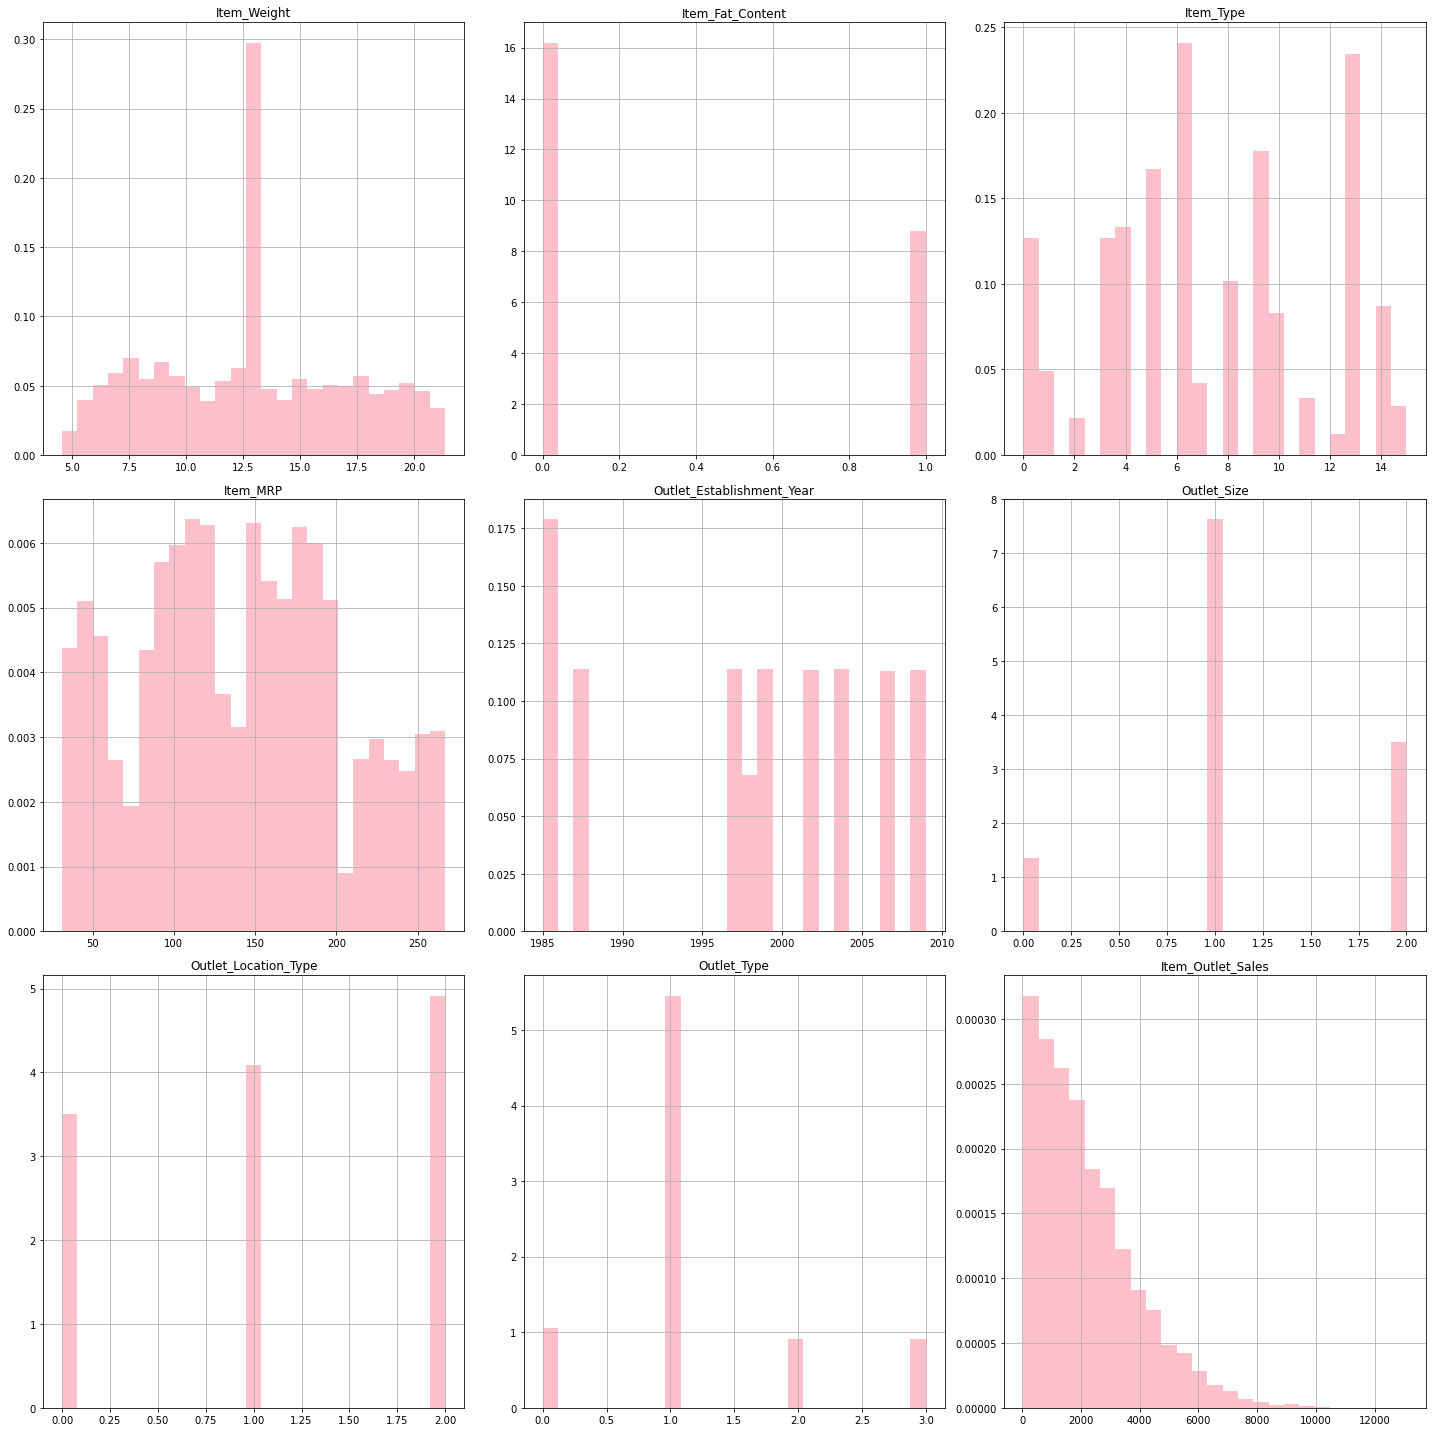

In [73]:
#Lets plot all using Histogram and see the skewness again
 
plt.rcParams['figure.figsize']=(20,20)
df.hist(bins=25,color='pink',density=True,label='Value',histtype='bar')
plt.tight_layout()
plt.show()

**WE can see that data is not normalized we have to treat this but we will remove outliers first...**

# Considering the outliers removal

In [74]:
df.shape

(8523, 9)

In [75]:
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([ 130,  145,  276,  304,  333,  373,  456,  472,  661,  694,  753,
         809,  935,  991,  997, 1009, 1138, 1254, 1450, 1506, 1859, 1998,
        2109, 2216, 2238, 2293, 2516, 2535, 2776, 3083, 3087, 3098, 3154,
        3234, 3286, 3407, 3667, 3709, 3720, 3757, 4289, 4346, 4349, 4676,
        4681, 4772, 4888, 4961, 4991, 5065, 5177, 5185, 5223, 5315, 5500,
        5550, 5619, 5752, 5799, 5812, 5977, 6000, 6134, 6334, 6409, 6537,
        6541, 6606, 6886, 6993, 7016, 7076, 7188, 7191, 7236, 7256, 7302,
        7343, 7560, 7562, 7609, 7690, 7752, 7816, 7826, 7930, 8039, 8201,
        8245, 8447], dtype=int64),
 array([8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
        8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
        8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
        8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
        8, 8], dtype=int64))

In [76]:
df_new=df[(z<3).all(axis=1)]

In [77]:
df_new.shape

(8433, 9)

In [78]:
# Percentage of data loss

DataLoss=((8523-8433)/8523)*100
DataLoss

1.0559662090813093

**1.0559662090813093% of data was lossed during the Outliers Removal**

# **Seprating the columns into features and target**

In [79]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,0,4,249.8092,1999,1,0,1,3735.1380
1,5.92,1,14,48.2692,2009,1,2,2,443.4228
2,17.50,0,10,141.6180,1999,1,0,1,2097.2700
3,19.20,1,6,182.0950,1998,1,2,0,732.3800
4,8.93,0,9,53.8614,1987,0,2,1,994.7052


In [80]:
#Independent Variable
x=df.iloc[:,:-1]

# Dependent Variable
y=df.iloc[:,-1]

In [81]:
x.shape

(8523, 8)

In [82]:
y.shape

(8523,)

# Transforming data to remove skewness

In [83]:
from sklearn.preprocessing import power_transform

In [84]:
x=power_transform(x,method='yeo-johnson')

In [85]:
x

array([[-0.82263635, -0.73814723, -0.71234723, ..., -0.29329517,
        -1.37384276, -0.12348771],
       [-1.73380133,  1.35474328,  1.50465979, ..., -0.29329517,
         1.08832445,  1.04059102],
       [ 1.08636176, -0.73814723,  0.68439021, ..., -0.29329517,
        -1.37384276, -0.12348771],
       ...,
       [-0.49655592, -0.73814723,  0.24699567, ...,  1.390694  ,
        -0.13111325, -0.12348771],
       [-1.37344321,  1.35474328,  1.30530437, ..., -0.29329517,
         1.08832445,  1.04059102],
       [ 0.49178563, -0.73814723,  1.50465979, ...,  1.390694  ,
        -1.37384276, -0.12348771]])

In [86]:
from sklearn.preprocessing import StandardScaler

#transform my dataset into a standard normal distribution

sc=StandardScaler()

x=sc.fit_transform(x)
x

array([[-0.82263635, -0.73814723, -0.71234723, ..., -0.29329517,
        -1.37384276, -0.12348771],
       [-1.73380133,  1.35474328,  1.50465979, ..., -0.29329517,
         1.08832445,  1.04059102],
       [ 1.08636176, -0.73814723,  0.68439021, ..., -0.29329517,
        -1.37384276, -0.12348771],
       ...,
       [-0.49655592, -0.73814723,  0.24699567, ...,  1.390694  ,
        -0.13111325, -0.12348771],
       [-1.37344321,  1.35474328,  1.30530437, ..., -0.29329517,
         1.08832445,  1.04059102],
       [ 0.49178563, -0.73814723,  1.50465979, ...,  1.390694  ,
        -1.37384276, -0.12348771]])

In [87]:
x.mean()

7.815719990321412e-18

In [88]:
x.std()

1.0

## Model Training and testing

In [89]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [90]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print (f"At random state {i},the training accuracy is :- {r2_score(y_train,pred_train)}")
    print (f"At random state {i},the testing accuracy is :- {r2_score(y_test,pred_test)}")
    print ("\n\n")

At random state 0,the training accuracy is :- 0.520649919907313
At random state 0,the testing accuracy is :- 0.5290536214451473



At random state 1,the training accuracy is :- 0.5221990114238653
At random state 1,the testing accuracy is :- 0.5223865106378691



At random state 2,the training accuracy is :- 0.5256207382278842
At random state 2,the testing accuracy is :- 0.5088967908262284



At random state 3,the training accuracy is :- 0.513812360804536
At random state 3,the testing accuracy is :- 0.5553346348585817



At random state 4,the training accuracy is :- 0.5250282554639976
At random state 4,the testing accuracy is :- 0.5095277451040159



At random state 5,the training accuracy is :- 0.5252932708211905
At random state 5,the testing accuracy is :- 0.5104538697902755



At random state 6,the training accuracy is :- 0.5236635055408275
At random state 6,the testing accuracy is :- 0.5164216525838461



At random state 7,the training accuracy is :- 0.5274999317647064
At random sta

At random state 92,the testing accuracy is :- 0.5233642323610177



At random state 93,the training accuracy is :- 0.5225338201647838
At random state 93,the testing accuracy is :- 0.5211383133883271



At random state 94,the training accuracy is :- 0.5223264366866028
At random state 94,the testing accuracy is :- 0.5204092706966084



At random state 95,the training accuracy is :- 0.521493578516355
At random state 95,the testing accuracy is :- 0.5257319939180793



At random state 96,the training accuracy is :- 0.5255693072306283
At random state 96,the testing accuracy is :- 0.5061436920514722



At random state 97,the training accuracy is :- 0.521279939255444
At random state 97,the testing accuracy is :- 0.5255481984455983



At random state 98,the training accuracy is :- 0.5273268923382526
At random state 98,the testing accuracy is :- 0.5006553673785804



At random state 99,the training accuracy is :- 0.5182425485115438
At random state 99,the testing accuracy is :- 0.5366109571403046

In [91]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [92]:
# train the model
lr.fit(x_train,y_train)

LinearRegression()

In [93]:
# predict the  data with x_test

pred_test=lr.predict(x_test)

In [94]:
print (r2_score(y_test,pred_test))

0.5223865106378691


# CROSS VALIDATION OF THE LINEAR REGRESSION MODEL

In [95]:
Train_accuracy=r2_score(y_train,pred_train)
Test_accuracy=r2_score(y_test,pred_test)

from sklearn.model_selection import cross_val_score

for i in range(2,10):
    cv_score=cross_val_score(lr,x,y,cv=i)
    cv_mean=cv_score.mean()
    print (f"At cross fold {i} the cv score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy for testing is {Test_accuracy}")
    print ("\n\n")

At cross fold 2 the cv score is 0.5212452297011277 and accuracy score for training is -0.5301866707729932 and accuracy for testing is 0.5223865106378691



At cross fold 3 the cv score is 0.5212098587816733 and accuracy score for training is -0.5301866707729932 and accuracy for testing is 0.5223865106378691



At cross fold 4 the cv score is 0.519750305199993 and accuracy score for training is -0.5301866707729932 and accuracy for testing is 0.5223865106378691



At cross fold 5 the cv score is 0.520772971139965 and accuracy score for training is -0.5301866707729932 and accuracy for testing is 0.5223865106378691



At cross fold 6 the cv score is 0.5205759824092149 and accuracy score for training is -0.5301866707729932 and accuracy for testing is 0.5223865106378691



At cross fold 7 the cv score is 0.5210755147080787 and accuracy score for training is -0.5301866707729932 and accuracy for testing is 0.5223865106378691



At cross fold 8 the cv score is 0.520336575149995 and accuracy sco

**I will take cv 2 bcz it is near to r2_score accuracy bcz here the cv score is 52% and accuracy score is also 52%**

In [96]:
from sklearn import metrics

In [97]:

MAE= metrics.mean_absolute_error(y_test,pred_test)
MSE= metrics.mean_squared_error(y_test,pred_test)

In [98]:
print("mean absolute error:",MAE)
print("mean squared error:",MSE)

mean absolute error: 904.1995805208879
mean squared error: 1415798.4265388516


In [99]:
from math import sqrt
rmse = sqrt(MSE)
print("Root Mean Squared Error:",rmse)

Root Mean Squared Error: 1189.8732817148436


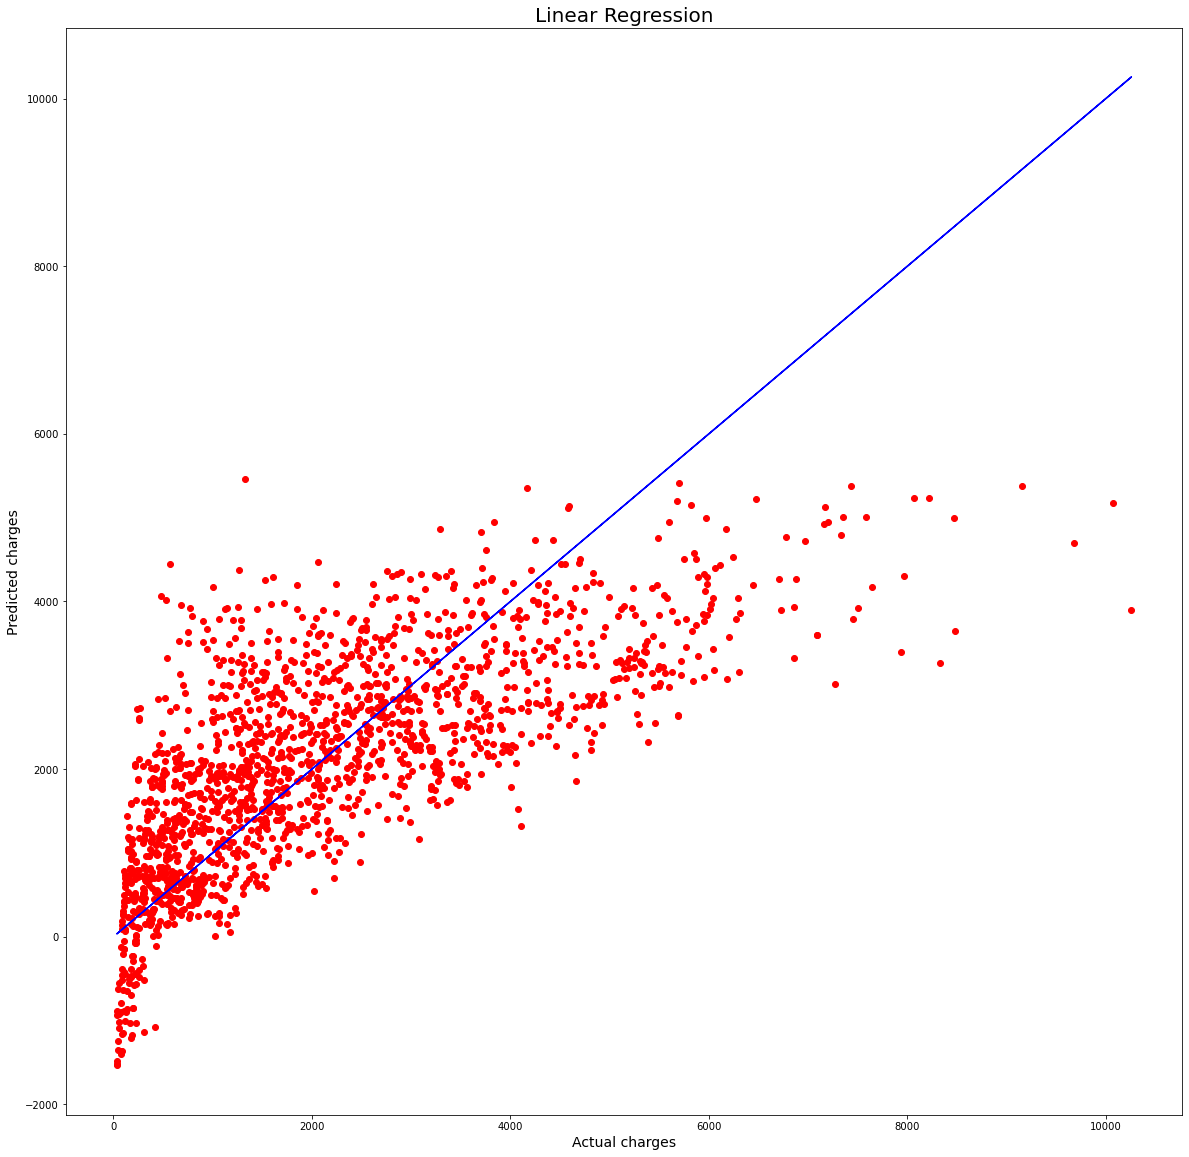

In [100]:
import matplotlib.pyplot as plt
plt.scatter (x=y_test,y=pred_test,color='r')

plt.plot(y_test,y_test,color='b')

plt.xlabel('Actual charges' ,fontsize=14)

plt.ylabel('Predicted charges', fontsize=14)
plt.title('Linear Regression' , fontsize=20)
plt. show()

**Here we can see that the data is falling on the best fit line which indicates that model is performing well**

# -----------------------------------------------------------------------------------------------------

# Lets Train with  Another Regressor Model 

In [101]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()

In [102]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    dt.fit(x_train,y_train)
    pred_train=dt.predict(x_train)
    pred_test=dt.predict(x_test)
    print (f"At random state {i},the training accuracy is :- {r2_score(y_train,pred_train)}")
    print (f"At random state {i},the testing accuracy is :- {r2_score(y_test,pred_test)}")
    print ("\n\n")

At random state 0,the training accuracy is :- 0.9997617537038779
At random state 0,the testing accuracy is :- 0.1450431481808303



At random state 1,the training accuracy is :- 0.9999445679210718
At random state 1,the testing accuracy is :- 0.1704050529479405



At random state 2,the training accuracy is :- 0.9997583484318754
At random state 2,the testing accuracy is :- 0.13521620378361143



At random state 3,the training accuracy is :- 0.9999445135684607
At random state 3,the testing accuracy is :- 0.20957381589844204



At random state 4,the training accuracy is :- 1.0
At random state 4,the testing accuracy is :- 0.12828619174527034



At random state 5,the training accuracy is :- 0.9997614902836882
At random state 5,the testing accuracy is :- 0.18222210348203627



At random state 6,the training accuracy is :- 0.9999447547693164
At random state 6,the testing accuracy is :- 0.1543063112362113



At random state 7,the training accuracy is :- 0.9999439517344171
At random state 7,the 

At random state 62,the testing accuracy is :- 0.1453689984428158



At random state 63,the training accuracy is :- 0.9999450150794593
At random state 63,the testing accuracy is :- 0.10807800805848744



At random state 64,the training accuracy is :- 1.0
At random state 64,the testing accuracy is :- 0.1834375539995089



At random state 65,the training accuracy is :- 1.0
At random state 65,the testing accuracy is :- 0.13190863561092558



At random state 66,the training accuracy is :- 1.0
At random state 66,the testing accuracy is :- 0.10375965028020184



At random state 67,the training accuracy is :- 0.999813009364418
At random state 67,the testing accuracy is :- 0.19655003289237583



At random state 68,the training accuracy is :- 0.9997619880916785
At random state 68,the testing accuracy is :- 0.15384891839136527



At random state 69,the training accuracy is :- 0.9999455370722256
At random state 69,the testing accuracy is :- 0.17227442080778932



At random state 70,the training ac

**We will not go for DecisionTreeRegressor bcz it is showing a Biased result here training score is very good but the testing score is very less,which is not good for a model and it will give baised result**

# Now Lets See SVR for model training

In [103]:
from sklearn.svm import SVR
sv=SVR()

In [104]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    sv.fit(x_train,y_train)
    pred_train=sv.predict(x_train)
    pred_test=sv.predict(x_test)
    print (f"At random state {i},the training accuracy is :- {r2_score(y_train,pred_train)}")
    print (f"At random state {i},the testing accuracy is :- {r2_score(y_test,pred_test)}")
    print ("\n\n")

At random state 0,the training accuracy is :- 0.08234078072348416
At random state 0,the testing accuracy is :- 0.07724820634316476



At random state 1,the training accuracy is :- 0.08068880215234531
At random state 1,the testing accuracy is :- 0.09581818733728231



At random state 2,the training accuracy is :- 0.08536395680003195
At random state 2,the testing accuracy is :- 0.06258002205376534



At random state 3,the training accuracy is :- 0.0800091643055616
At random state 3,the testing accuracy is :- 0.08206600147816978



At random state 4,the training accuracy is :- 0.08088774631131956
At random state 4,the testing accuracy is :- 0.08535473882169431



At random state 5,the training accuracy is :- 0.08039594331279976
At random state 5,the testing accuracy is :- 0.08764506874001499



At random state 6,the training accuracy is :- 0.08146169788080893
At random state 6,the testing accuracy is :- 0.07050530520439613



At random state 7,the training accuracy is :- 0.084876942011217

At random state 61,the training accuracy is :- 0.08124835429696109
At random state 61,the testing accuracy is :- 0.07816631361875759



At random state 62,the training accuracy is :- 0.07796582773006722
At random state 62,the testing accuracy is :- 0.08720628046959755



At random state 63,the training accuracy is :- 0.07702683655272746
At random state 63,the testing accuracy is :- 0.0792796317276967



At random state 64,the training accuracy is :- 0.08340501762594987
At random state 64,the testing accuracy is :- 0.08740873440036834



At random state 65,the training accuracy is :- 0.08448247939942766
At random state 65,the testing accuracy is :- 0.07304229469003132



At random state 66,the training accuracy is :- 0.08457517338371645
At random state 66,the testing accuracy is :- 0.0834824724744957



At random state 67,the training accuracy is :- 0.08645766889772755
At random state 67,the testing accuracy is :- 0.08594634008196633



At random state 68,the training accuracy is :- 0.0

**So we are not going to take SVR model bcz here the accuracy of training and testing is not even 10% ,so the model is performing very bad**

# Now Lets take KNeighborsRegressor

In [105]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()

In [106]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    knn.fit(x_train,y_train)
    pred_train=knn.predict(x_train)
    pred_test=knn.predict(x_test)
    print (f"At random state {i},the training accuracy is :- {r2_score(y_train,pred_train)}")
    print (f"At random state {i},the testing accuracy is :- {r2_score(y_test,pred_test)}")
    print ("\n\n")

At random state 0,the training accuracy is :- 0.674816766700709
At random state 0,the testing accuracy is :- 0.518574131592013



At random state 1,the training accuracy is :- 0.6735993268490372
At random state 1,the testing accuracy is :- 0.5143238015375236



At random state 2,the training accuracy is :- 0.6739620139538921
At random state 2,the testing accuracy is :- 0.5287251569283864



At random state 3,the training accuracy is :- 0.6726265404171539
At random state 3,the testing accuracy is :- 0.537716566819886



At random state 4,the training accuracy is :- 0.6766102388468188
At random state 4,the testing accuracy is :- 0.5045280048681668



At random state 5,the training accuracy is :- 0.6809735872145666
At random state 5,the testing accuracy is :- 0.4765658273988621



At random state 6,the training accuracy is :- 0.6771458682101295
At random state 6,the testing accuracy is :- 0.503378277959307



At random state 7,the training accuracy is :- 0.6819009081171705
At random state

At random state 62,the training accuracy is :- 0.6682632545835809
At random state 62,the testing accuracy is :- 0.5400708223469132



At random state 63,the training accuracy is :- 0.6745307576246706
At random state 63,the testing accuracy is :- 0.5297184456184796



At random state 64,the training accuracy is :- 0.678636296165571
At random state 64,the testing accuracy is :- 0.4982304909547227



At random state 65,the training accuracy is :- 0.6688175452648328
At random state 65,the testing accuracy is :- 0.5281583075015202



At random state 66,the training accuracy is :- 0.6779004180524332
At random state 66,the testing accuracy is :- 0.48735760809962336



At random state 67,the training accuracy is :- 0.6739168608573911
At random state 67,the testing accuracy is :- 0.5343447462842346



At random state 68,the training accuracy is :- 0.6701198236740987
At random state 68,the testing accuracy is :- 0.5151681411993457



At random state 69,the training accuracy is :- 0.6724034398937

**Here in KNeighborsRegressor The score of training and testing is very baised ,here in random state till 100 there is atleast a difference of 10% which will result in baisness**

# ---------------------------------------------------------------------------------

## Hyper Parameter tuning

In [107]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [108]:
from sklearn.linear_model import Lasso
parameter={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}

ls= Lasso()
clf=GridSearchCV(ls,parameter)
clf.fit(x_train,y_train)

print (clf.best_params_)

{'alpha': 1, 'random_state': 0}


In [109]:
# Final model training
ls=Lasso(alpha=1,random_state=0)
ls.fit(x_train,y_train)
ls_score_training = ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)
ls_score_training*100


51.82386266234258

In [110]:
pred_ls=ls.predict(x_test)

In [111]:
lss=r2_score(y_test,pred_ls)
lss*100


53.64608344050961

In [112]:
cv_score=cross_val_score(ls,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean*100

52.0792257246659

**Our Linear Regression and Lasso Model are almost same as in case of accuracy**

### HPT on RandonForestRegressor

In [113]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor


In [114]:
parameter={'criterion' :['mse','mae'],
          'max_features':['auto','sqrt','log2']}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameter)
clf.fit(x_train,y_train)

print (clf.best_params_)

{'criterion': 'mae', 'max_features': 'log2'}


In [115]:
rf=RandomForestRegressor(criterion='mae',max_features='sqrt')
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_decision= rf.predict(x_test)

rfs=r2_score(y_test,pred_decision)
print ('R2 Score :',rfs*100)

rfscore=cross_val_score(rf,x,y,cv=5)
rfc=rfscore.mean()
print ('Cross Val Score:',rfc*100)

R2 Score : 55.959955623142
Cross Val Score: 55.046584301676226


**we are getting our model accuracy and cross validation both very close which showes our model is performing well.**

In [116]:
import pickle
filename='BDMSP.pkl'
pickle.dump(rf,open(filename,'wb'))

In [117]:
loaded_model=pickle.load(open('BDMSP.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

55.959955623142


**And here we can see that the model is redicting right**